In [1]:
###Image Recognition with Trained Model
# Import the libraries
import numpy as np
# Importing os libraries so we can open folder on local storage
import os
# Import an object with methods to process image data
from keras.preprocessing import image

# Import the pre-trained model
from keras.models import Model
from keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam

# We need to install libraries tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
myFile = "/content/drive/MyDrive/data"
fullPath = os.path.abspath("/content/drive/MyDrive/data")
data_for_processing = tf.keras.utils.get_file( fname= myFile,origin='file://'+fullPath)


In [4]:
# Preparing variables for keras model

img_height,img_width=180,180
batch_size=32
number_classes = 2

In [5]:
# Spliting our data set for training and test

# We split our data_for_processing and take 80% of available data and put it in train_ds
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,                          #               
  validation_split=0.3,                         # Optional float between 0 and 1, fraction of data to reserve for validation.  
  subset="training",                            # One of "training" or "validation". Only used if validation_split is set.
  seed=123,                                     # Optional random seed for shuffling and transformations.
  image_size=(img_height, img_width),           # Size to resize images to after they are read from disk. Defaults to (256, 256)
  batch_size=batch_size)                        # Size of the batches of data. Default: 32. If None, the data will not be batched

# We split our data_for_processing and take 20% of available data and put it in val_ds
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_for_processing,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 120 files belonging to 2 classes.
Using 84 files for training.
Found 120 files belonging to 2 classes.
Using 36 files for validation.


In [6]:
# Getting names of our classes. In this model class names are names of folders contained in mask folder

class_names = train_ds.class_names

print(class_names)

['with_mask', 'without_mask']


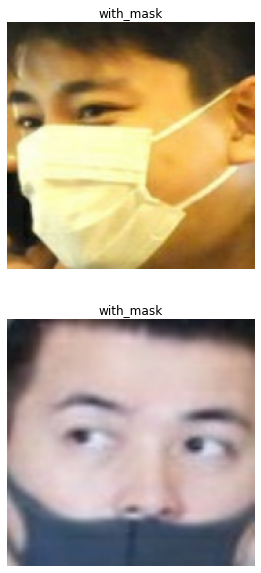

In [7]:
# Taking a look at our images in train_ds
# It show random images from our storage

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    # plt.subplot(Three integers (nrows, ncols, index).)
    plt.subplot(2, 1, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# Initializing Sequential() model to resnet_model

resnet_model = Sequential()

# Instantiates the ResNet50 architecture.

pretrained_model= tf.keras.applications.ResNet50(
                include_top=False,                              # Whether to include the fully-connected layer at the top of the network.
                input_shape=(img_height,img_width,3),           # Optional shape tuple, only to be specified if include_top is False
                pooling='avg',                                  # Optional pooling mode for feature extraction when include_top is False. avg means that global average pooling will be applied to the output of the last convolutional block, and thus the output of the model will be a 2D tensor.
                classes=number_classes,                                      # Optional number of classes to classify images into, only to be specified if include_top is True
                weights='imagenet')                             # 'imagenet' (pre-training on ImageNet) None
for layer in pretrained_model.layers:
        layer.trainable=False
# Adding pre trained ResNet50 model to our..
resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 0s 0us/step


In [9]:
# Further prepering model
# Flattens the input
resnet_model.add(layers.Flatten())
# Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the 
# element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
# and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense.
# Relu  (Rectified Linear Unit) Activation Function 
resnet_model.add(layers.Dense(512, activation='relu'))
# Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, 
# where the probabilities of each value are proportional to the relative scale of each value in the vector.
# Output Shape 
resnet_model.add(layers.Dense(1, activation='sigmoid'))


resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
# Training a Model and Model Evaluation

# optimizer= Name of optimizer or optimizer instance. See tf.keras.optimizers.
# Adam(learning_rate=0.001) is optimizer we choose and imported
# loss = Loss function. Maybe be a string (name of loss function), or a tf.keras.losses.Loss instance. See tf.keras.losses. 
## A loss function is any callable with the signature
# parse_categorical_crossentropy = Computes the sparse categorical crossentropy loss.
# metrics = List of metrics to be evaluated by the model during training and testing
#resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss=,metrics=['accuracy'])
resnet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


# Training a model with train_ds and val_ds and giving epochs = 10 where 10 number of iterations of training
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
3/3 [==============================] - 24s 9s/step - loss: 0.6701 - accuracy: 0.6310 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2/5
3/3 [==============================] - 13s 5s/step - loss: 0.0973 - accuracy: 0.9762 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 13s 5s/step - loss: 0.0638 - accuracy: 0.9881 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 13s 5s/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 13s 5s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0390 - val_accuracy: 0.9722


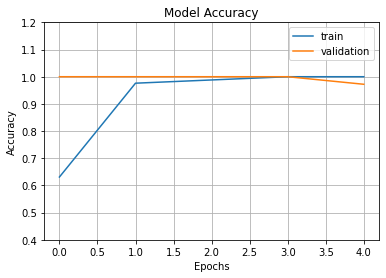

In [11]:
# Visualization of model metrics

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
# Saving the model and the weights
# resnet_model.save_weights("my_model_weights.h5")
resnet_model.save("amrModel.h5")